# Lending Case Study: Exploratory Data Analysis

## Steps for EDA:

- Import Necessary Libraries
- Load the Data
- Data Understanding
- Data Cleaning
- Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
loan_data = pd.read_csv("loan.csv")

In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan_data.shape

(39717, 111)

# Data Cleaning: 

### Check percentage of Missing values in each column

In [5]:
round(100*loan_data.isnull().mean())

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

### Remove columns which has all the rows of missing values

In [6]:
loan_data.dropna(axis=1, how ='all', inplace=True)

In [7]:
loan_data.shape

(39717, 57)

In [8]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [272]:
round(100*loan_data.isnull().mean())

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

### Removing columns which are having more than 30% of null values

In [9]:
remove_cols = ["desc", "mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d"]
loan_data.drop(remove_cols, axis=1, inplace=True)

In [10]:
loan_data.shape

(39717, 53)

In [11]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Removing single valued columns which cannont contribute to our analysis in any way

In [12]:
remov_single_valued_cols = ["pymnt_plan", "initial_list_status", "collections_12_mths_ex_med", "policy_code","application_type","acc_now_delinq","delinq_amnt","pub_rec_bankruptcies","tax_liens"]
loan_data.drop(remov_single_valued_cols, axis=1, inplace=True)

In [13]:
loan_data.shape

(39717, 44)

In [14]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'chargeoff_within_12_mths'],
      dtype='object')

### Removing extra columns which are not helpful for the analysis

- As we are analysing the driving factors of loan defaulting.
- There are columns such as "id", "emp_title", "url", "title", "zip_code", "last_credit_pull_d", "chargeoff_within_12_mths"       which are not contributing to the analysis analysis in any way due to irrelavant information so removing them
- "funded_amnt" is same as loan_amnt as we need only actual funded amount so removing the column
- "out_prncp_inv", "total_pymnt_inv" as these are useful for investors removing them.
- "revol_bal" as we are having available revolving credit("credit that is automatically renewed as debts are paid off") so          removing total credit of revolving balance


In [15]:
remove_extra_cols = ["id", "funded_amnt", "emp_title", "url", "title", "zip_code", "delinq_2yrs", "last_credit_pull_d", "chargeoff_within_12_mths", "out_prncp_inv", "total_pymnt_inv", "recoveries","collection_recovery_fee", "total_rec_prncp","total_rec_int","total_rec_late_fee", "last_pymnt_d","last_pymnt_amnt", "revol_bal", "earliest_cr_line"]
loan_data.drop(remove_extra_cols, axis=1, inplace=True)

In [16]:
loan_data.shape

(39717, 24)

In [17]:
loan_data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt'],
      dtype='object')

### Checking for missing values

In [18]:
loan_data.isnull().mean()*100

member_id              0.000000
loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.125891
total_acc              0.000000
out_prncp              0.000000
total_pymnt            0.000000
dtype: float64

## Handling Missing Values

- Columns with missing values are emp_length and revol_util

In [19]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   member_id            39717 non-null  int64  
 1   loan_amnt            39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  issue_d              39717 non-null  object 
 13  loan_status          39717 non-null  object 
 14  purpose              39717 non-null  object 
 15  addr_state           39717 non-null 

In [20]:
loan_data.emp_length.mode()[0]

'10+ years'

#### Imputing Mode values to emp_length column as it is having very low percentage of null values

In [21]:
loan_data["emp_length"].fillna(loan_data.emp_length.mode()[0], inplace=True)

In [22]:
loan_data["emp_length"].isna().sum()  # Imputing is completed for emp_length columns as it is showing  0 null values

0

In [23]:
loan_data.dropna(subset = ['revol_util'], inplace=True)

In [24]:
loan_data.revol_util.isna().sum()

0

# Standardising Values

- The columns which are described as Object column but it has Continuous values
- Standardising values for "int_rate", "term",  and "revol_util" columns

In [25]:
loan_data["int_rate"] = loan_data["int_rate"].apply(lambda x: float(x.replace("%", ""))if isinstance(x, str) else x)

In [26]:
loan_data["term"] = loan_data["term"].apply(lambda x: int(x.replace("months", ""))if isinstance(x, str) else x)

In [27]:
loan_data["revol_util"] = loan_data["revol_util"].apply(lambda x: float(x.replace("%", ""))if isinstance(x, str) else x)

In [28]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39667 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   member_id            39667 non-null  int64  
 1   loan_amnt            39667 non-null  int64  
 2   funded_amnt_inv      39667 non-null  float64
 3   term                 39667 non-null  int64  
 4   int_rate             39667 non-null  float64
 5   installment          39667 non-null  float64
 6   grade                39667 non-null  object 
 7   sub_grade            39667 non-null  object 
 8   emp_length           39667 non-null  object 
 9   home_ownership       39667 non-null  object 
 10  annual_inc           39667 non-null  float64
 11  verification_status  39667 non-null  object 
 12  issue_d              39667 non-null  object 
 13  loan_status          39667 non-null  object 
 14  purpose              39667 non-null  object 
 15  addr_state           39667 non-null  obje

In [29]:
loan_data.head()

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,total_pymnt
0,1296599,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,credit_card,AZ,27.65,1,3,0,83.7,9,0.00,5863.155187
1,1314167,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,car,GA,1.00,5,3,0,9.4,4,0.00,1008.710000
2,1313524,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,small_business,IL,8.72,2,2,0,98.5,10,0.00,3005.666844
3,1277178,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,other,CA,20.00,1,10,0,21.0,37,0.00,12231.890000
4,1311748,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,...,other,OR,17.94,0,15,0,53.9,38,524.06,3513.330000


## Removing Outliers 

<Axes: xlabel='annual_inc'>

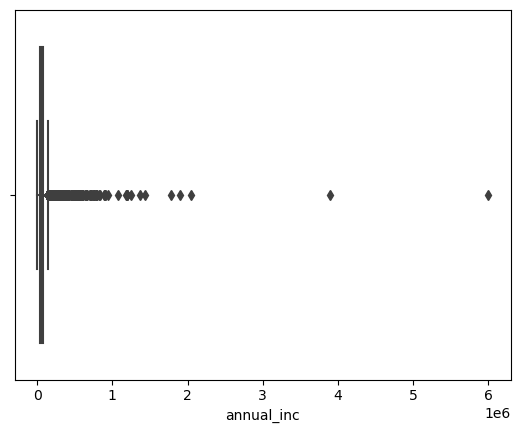

In [30]:
sns.boxplot(data=loan_data, x='annual_inc')

In [31]:
# Quantiles of annual_inc

quantile_annual_inc = loan_data["annual_inc"].quantile([0.25, 0.50, 0.75, 0.95])
quantile_annual_inc

0.25     40516.32
0.50     59000.00
0.75     82400.00
0.95    142000.00
Name: annual_inc, dtype: float64

In [32]:
quantile_95_annual_inc = loan_data["annual_inc"].quantile(0.95)
loan_data = loan_data[loan_data["annual_inc"] <= quantile_95_annual_inc]

<Axes: xlabel='annual_inc'>

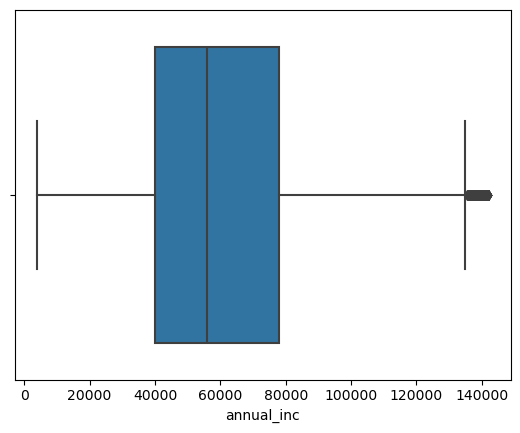

In [33]:
sns.boxplot(x=loan_data["annual_inc"])

### As annual_inc data looks good so checking other numerical columns for  outliers and remove it

<Axes: xlabel='loan_amnt'>

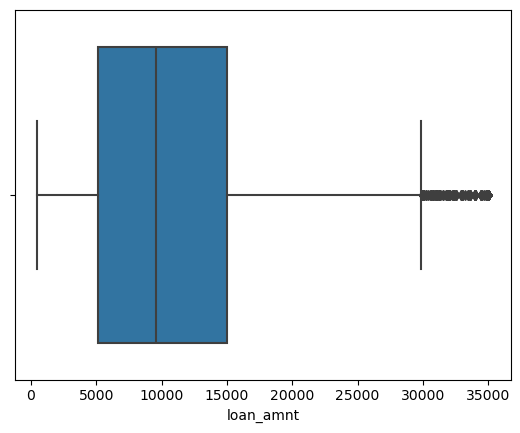

In [34]:
# Removing outliers for loan_amnt
sns.boxplot(x=loan_data['loan_amnt'])

In [35]:
# Quantiles of annual_inc

quantile_loan_amnt = loan_data["loan_amnt"].quantile([0.25, 0.50, 0.75, 0.95])
quantile_loan_amnt

0.25     5100.0
0.50     9600.0
0.75    15000.0
0.95    25000.0
Name: loan_amnt, dtype: float64

In [36]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37695 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   member_id            37695 non-null  int64  
 1   loan_amnt            37695 non-null  int64  
 2   funded_amnt_inv      37695 non-null  float64
 3   term                 37695 non-null  int64  
 4   int_rate             37695 non-null  float64
 5   installment          37695 non-null  float64
 6   grade                37695 non-null  object 
 7   sub_grade            37695 non-null  object 
 8   emp_length           37695 non-null  object 
 9   home_ownership       37695 non-null  object 
 10  annual_inc           37695 non-null  float64
 11  verification_status  37695 non-null  object 
 12  issue_d              37695 non-null  object 
 13  loan_status          37695 non-null  object 
 14  purpose              37695 non-null  object 
 15  addr_state           37695 non-null  obje

## Segregating columns to visualize using graphs and plots:

In [37]:
extra_cols = ["member_id", "issue_d", "addr_state", "out_prncp", "inq_last_6mths","pub_rec","open_acc"]  # Can be useful for further analysis 
num_cols = ["loan_amnt", "funded_amnt_inv", "term", "int_rate", "installment", "annual_inc", "dti",  "revol_util", "total_acc", "total_pymnt"]
cat_cols = ["grade", "sub_grade", "emp_length", "home_ownership", "verification_status", "loan_status", "purpose", ]

# Exploratory Data Analysis for the segregated columns

## Problem statement : To find 'Who is most likely to Default the Loans issued.

### Univariate Analysis

#### 1. Numerical

Histplot of loan_amnt


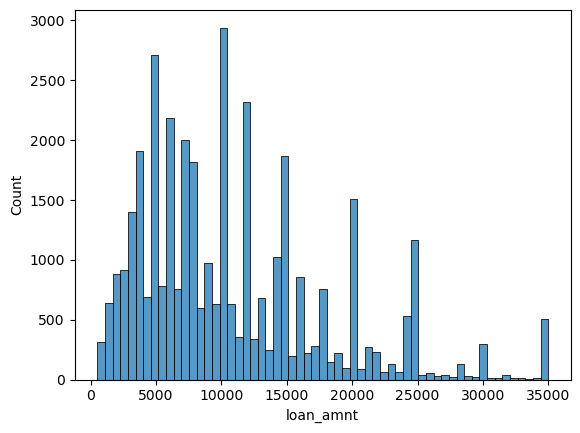

Histplot of funded_amnt_inv


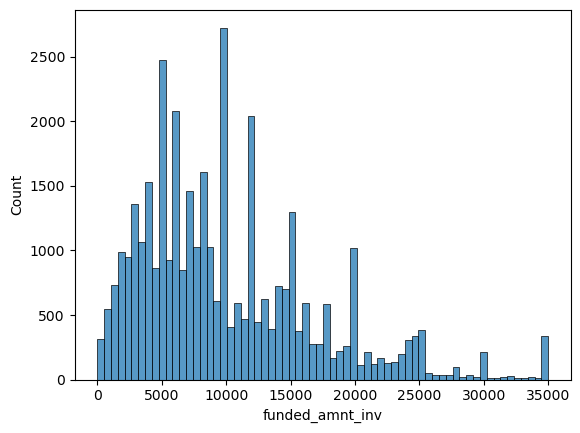

Histplot of term


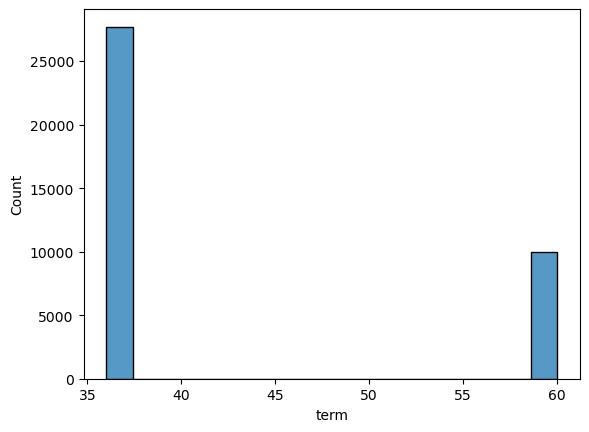

Histplot of int_rate


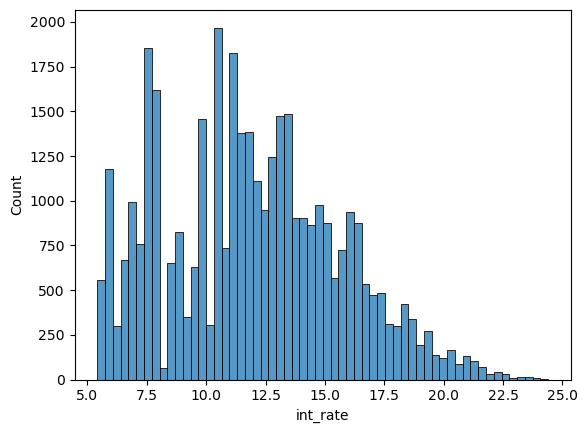

Histplot of installment


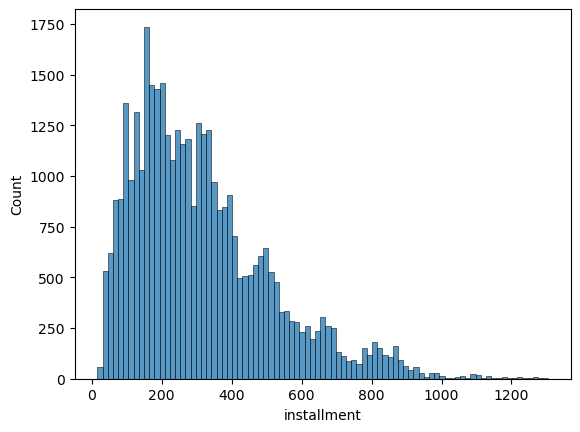

Histplot of annual_inc


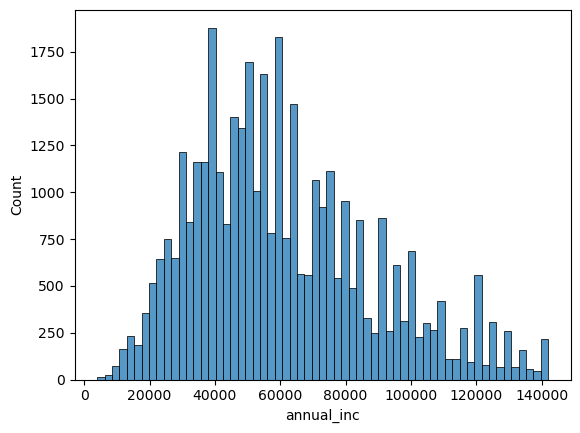

Histplot of dti


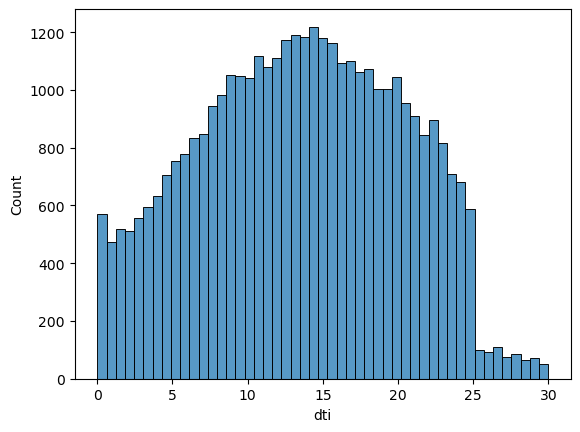

Histplot of revol_util


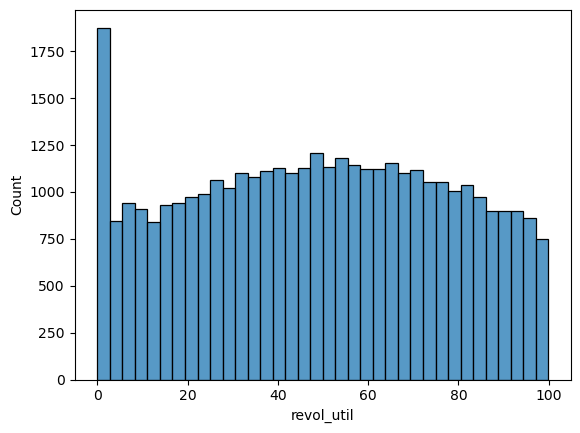

Histplot of total_acc


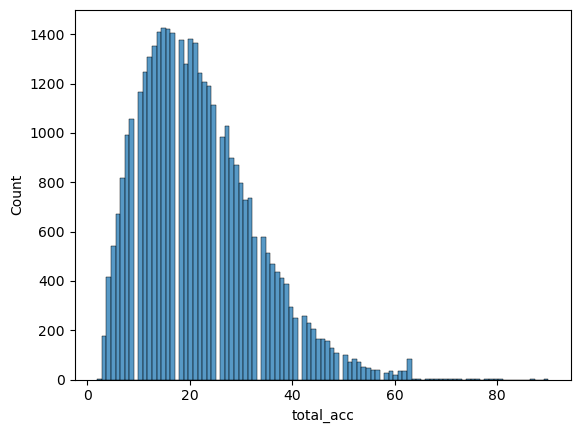

Histplot of total_pymnt


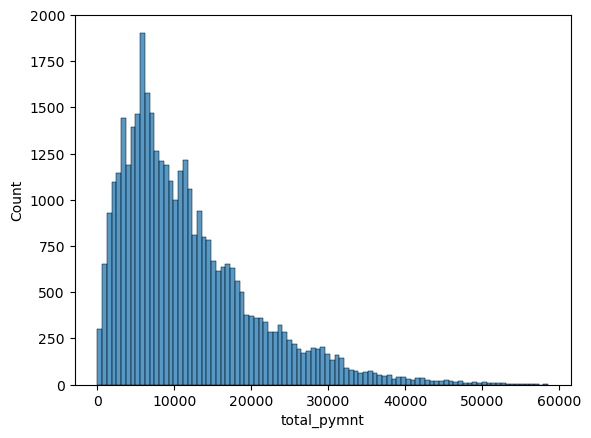

In [38]:
for i in num_cols:
    print("Histplot of", i)
    sns.histplot(x= loan_data[i])
    plt.show()

### Insights

- Loan amount is varying from 2000 to 14000 but the highest loan amount borrowed is between 4000 to 6000 and 8000 to 12000
- Highest Amount funded by inveestors at the time ranges between 4000 to 12000
- Maximum terms for the loan is 35 to 36 months
- Maximum Interest rate varying between 6 to 16.5 in that highest rate of interest ranges between 6 to 7.5 and 10.5 to 11.5
- Maximum number of instalments for the loan is less than 400
- Maximum annual income of the borrowers is 30000 to 60000
- Total payment wrt loan amount is less than 10000 

##### 2. Categorical

Histplot of grade


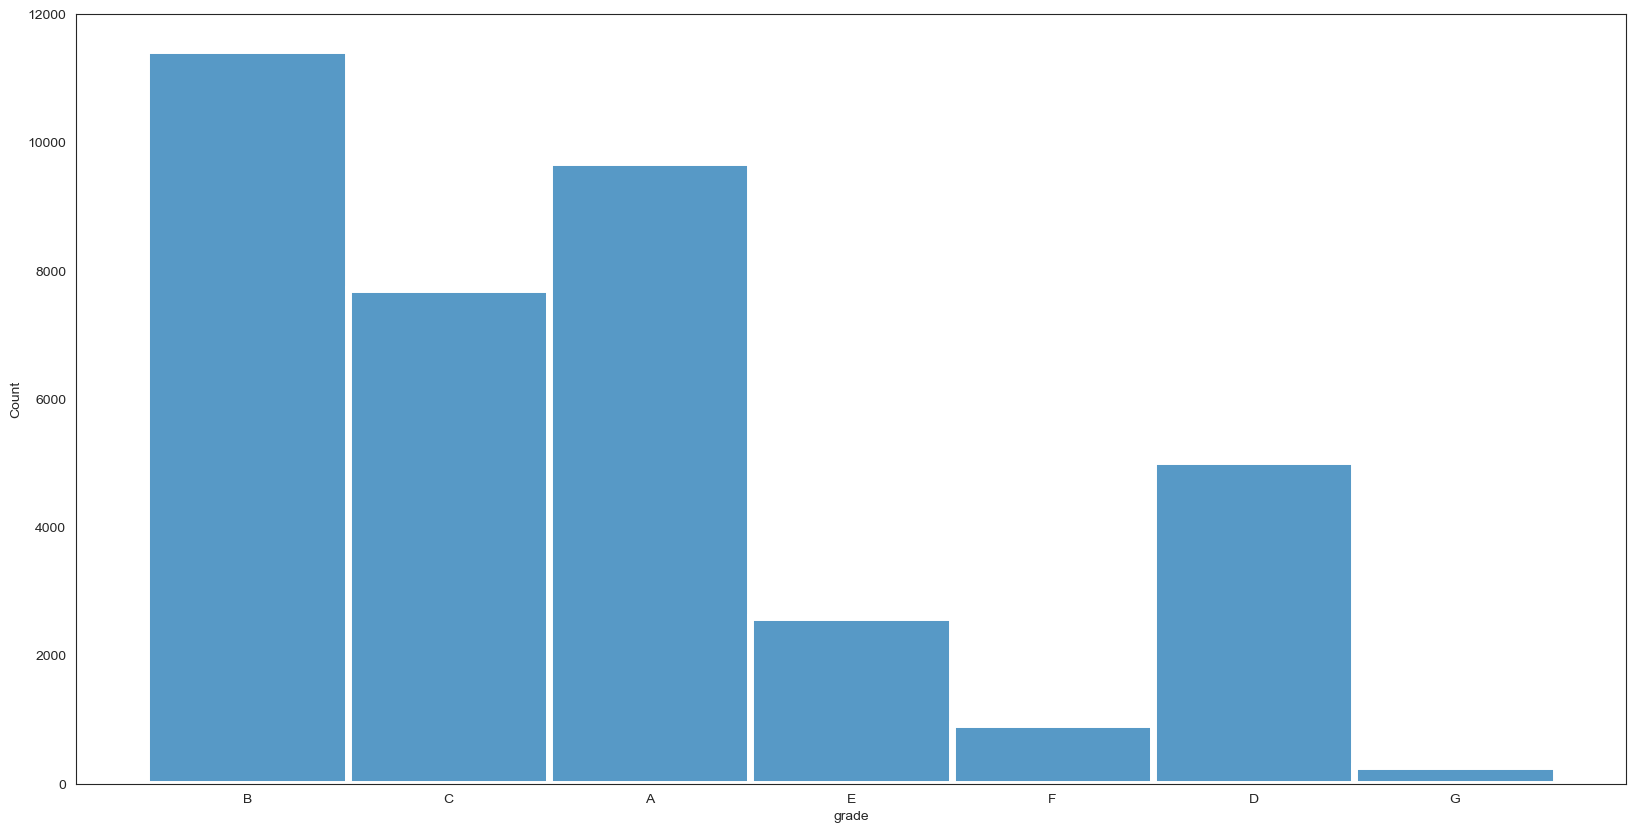

Histplot of sub_grade


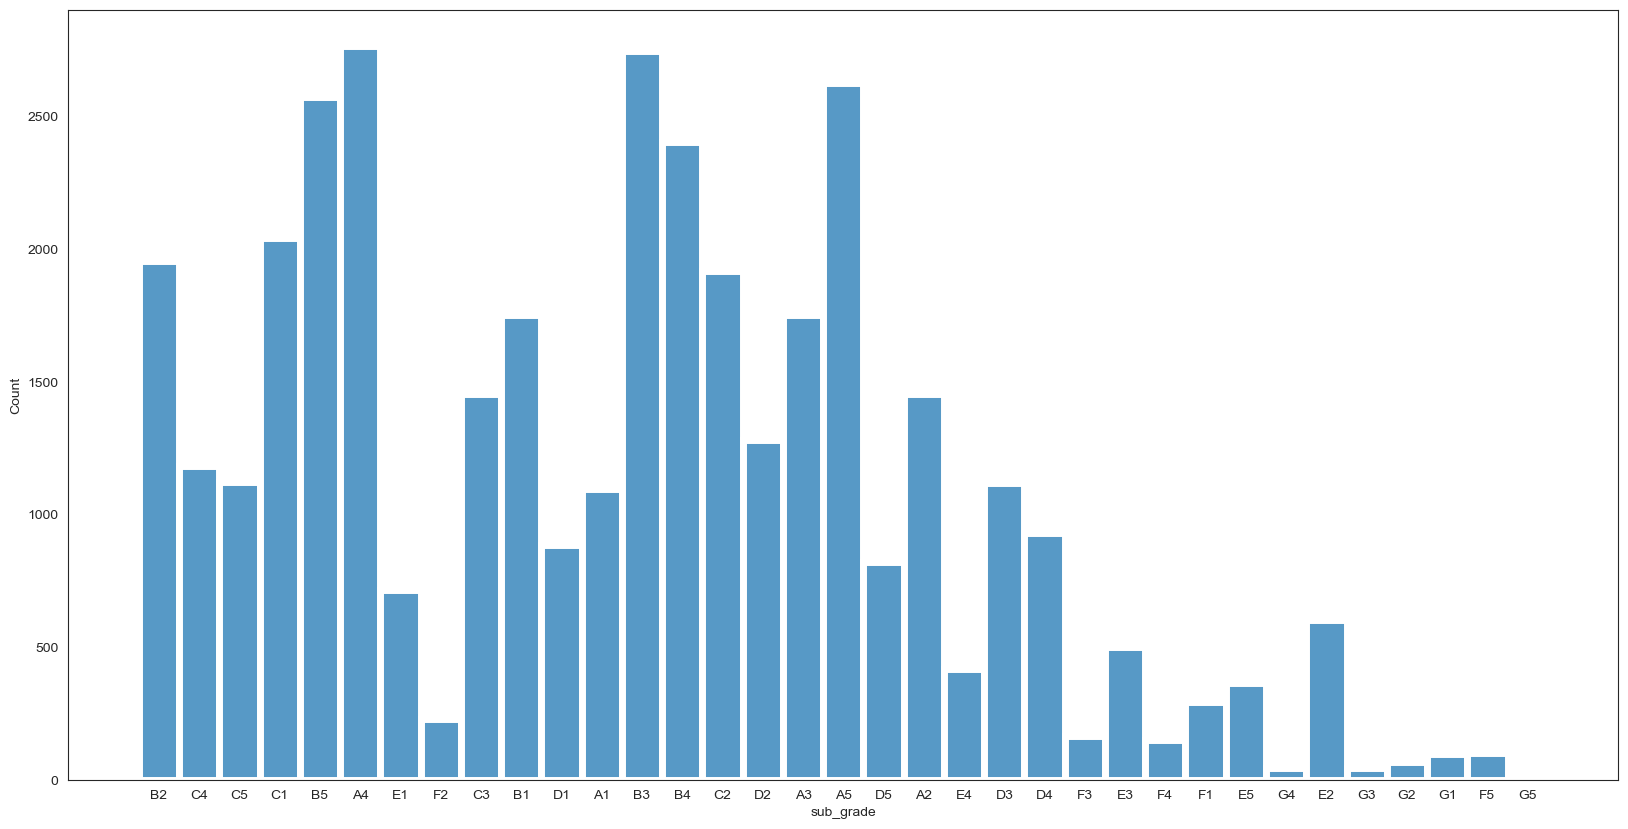

Histplot of emp_length


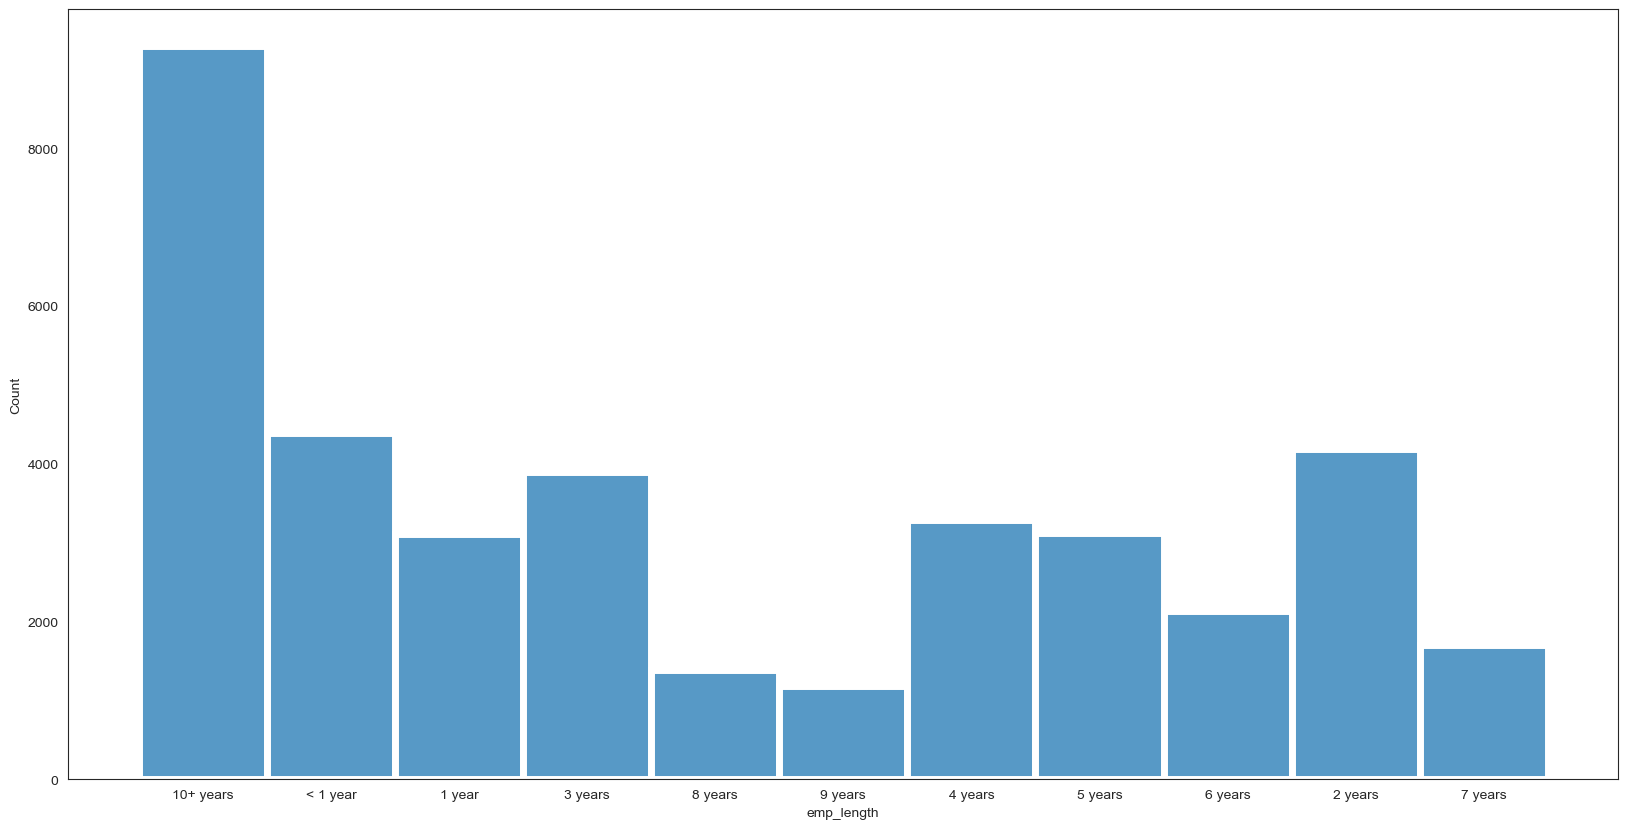

Histplot of home_ownership


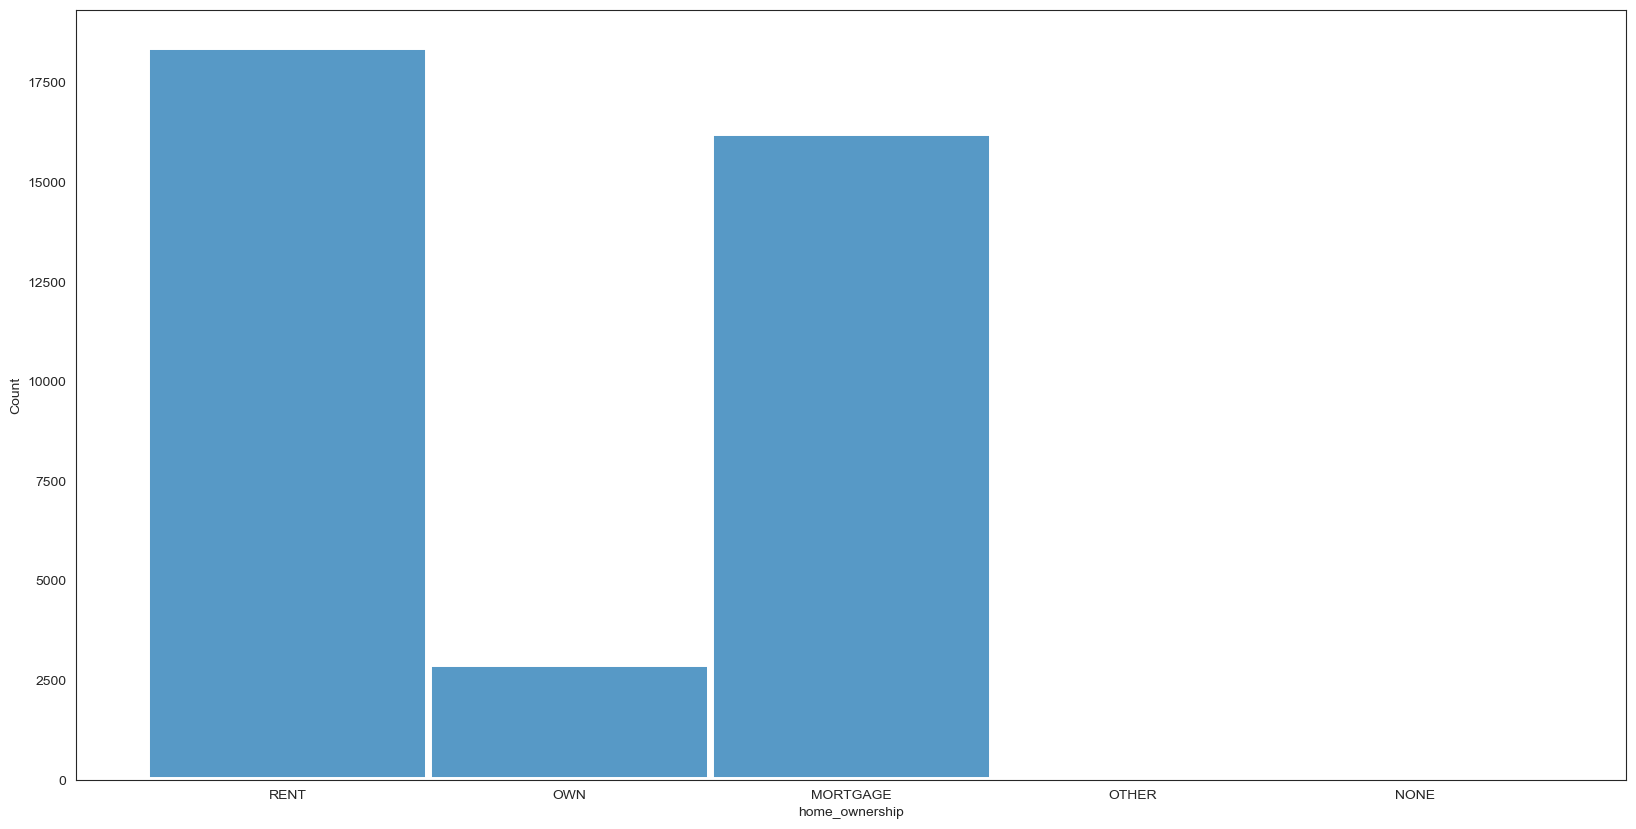

Histplot of verification_status


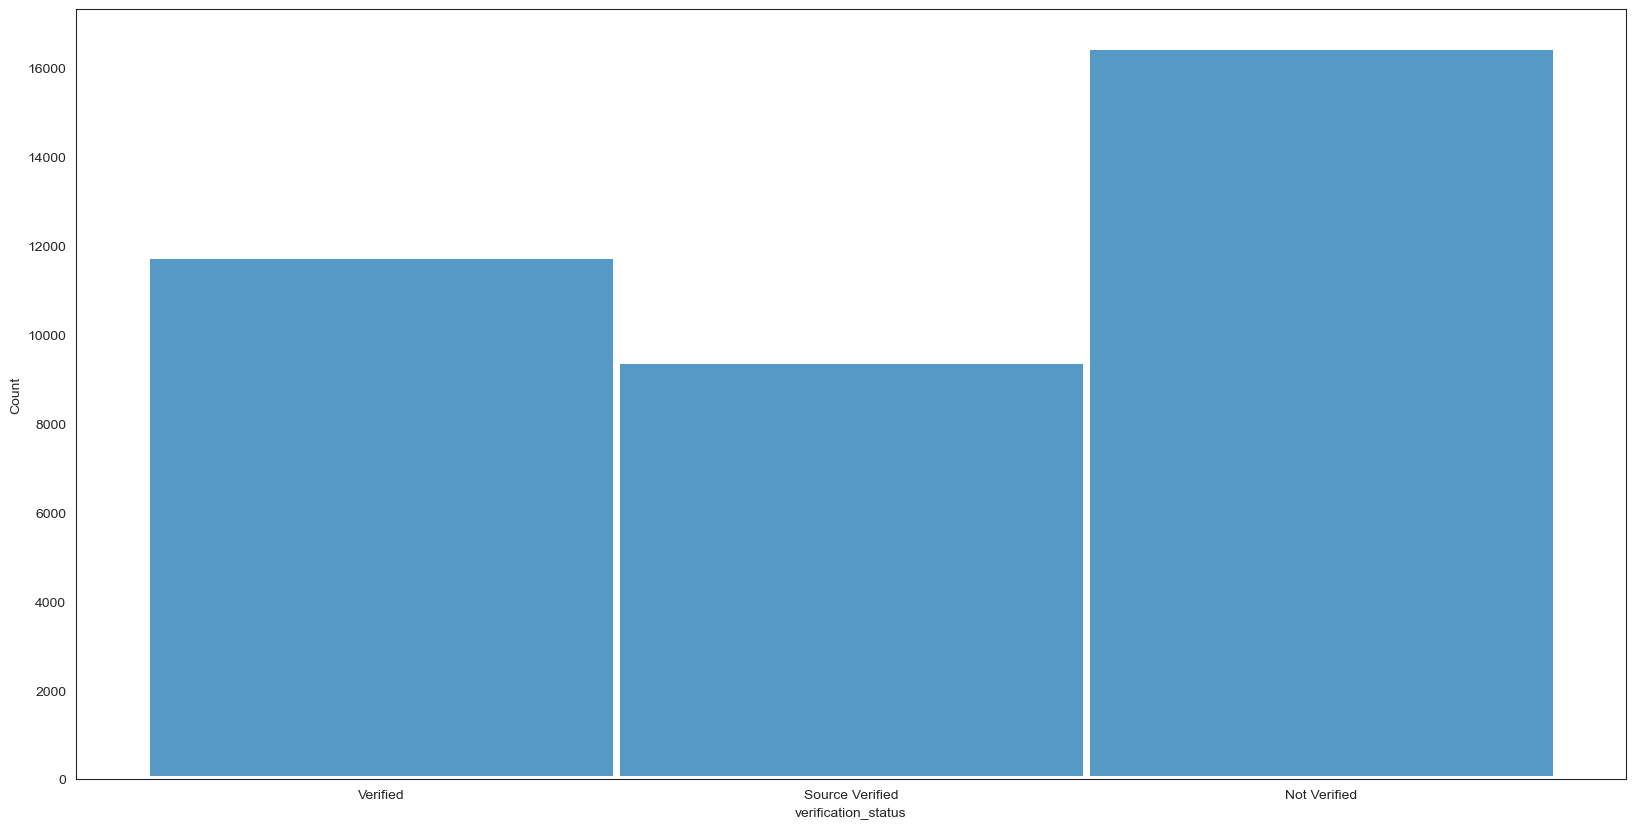

Histplot of loan_status


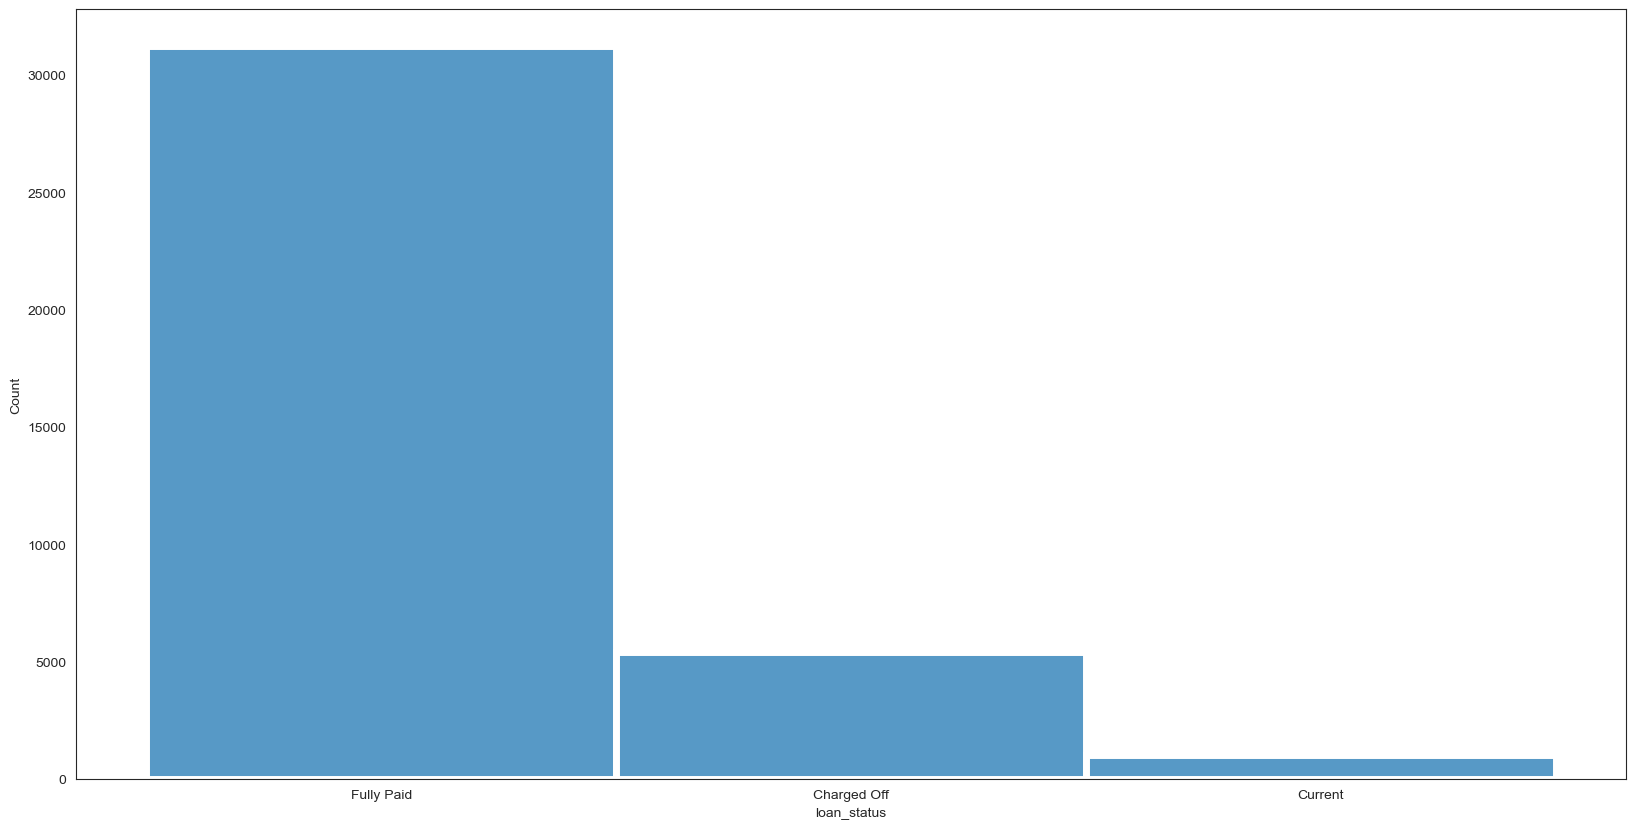

Histplot of purpose


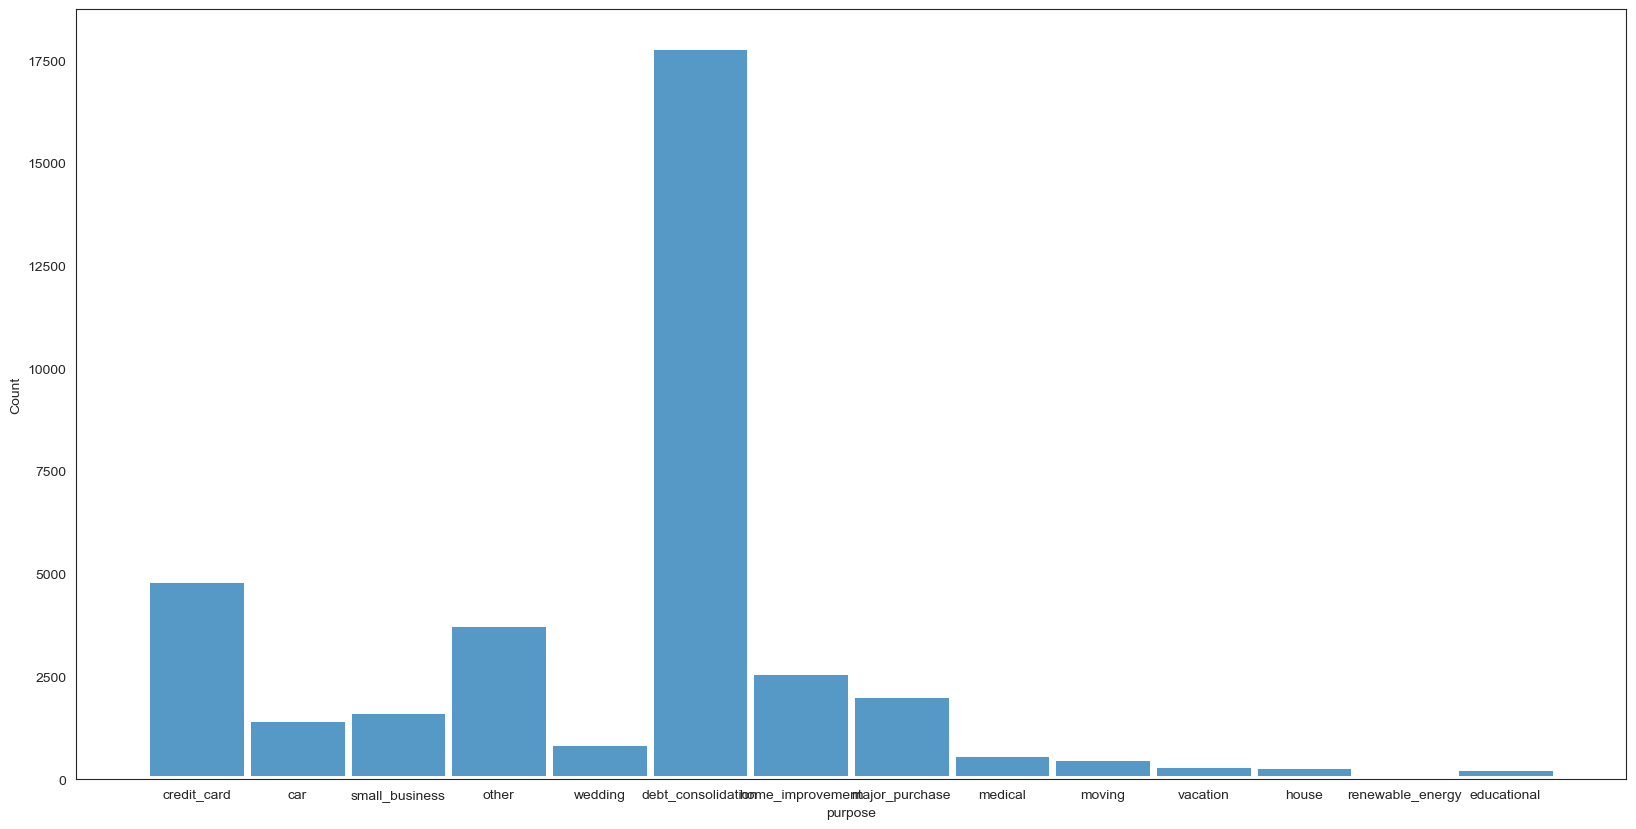

In [39]:
for i in cat_cols:
    print("Histplot of", i)
    sns.set_style("white")
    sns.histplot(x= loan_data[i], linewidth=5.0)
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    plt.show()

### Insights for categorical Values

- B Grade borrower's are more than other grades
- A4 subgrade borrower's are more compare to other 
- 10+ years is the maximum employment length of borrowers
- Maximum borrower's home ownership is RENT
- Verification status for most of the loan given is not verified
- Most of the borrower's has takenn loan for the purpose of debt_consolidation

# Visualizing Categorical data wrt Defaulters

- As we are analysing only defaulters data, so analysing defaulter factorial which `Charged_off` with respect to other variable to find out the reasons to have defaulters

<Axes: xlabel='loan_status', ylabel='count'>

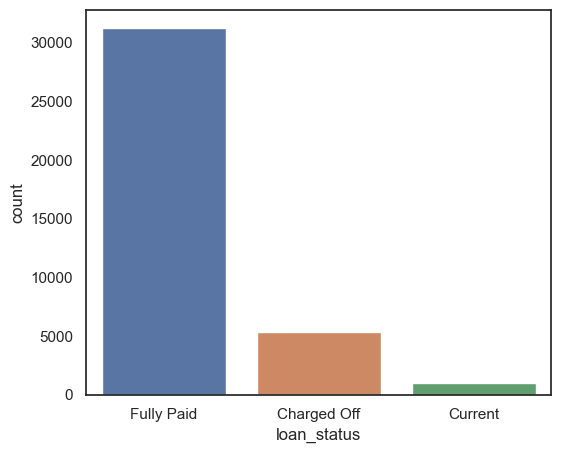

In [319]:
sns.countplot(x = 'loan_status', data=loan_data)

## Categorical vs Charged Off

### Analysing the data with grade and subgarade as subgrade is having interger value in it we can extract int from it and plotting wrt Charged_off

In [320]:
loan_data['sub_grade'] = pd.to_numeric(loan_data["sub_grade"].apply(lambda x: x[-1]))

In [321]:
loan_data["sub_grade"].head()

0    2
1    4
2    5
3    1
4    5
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

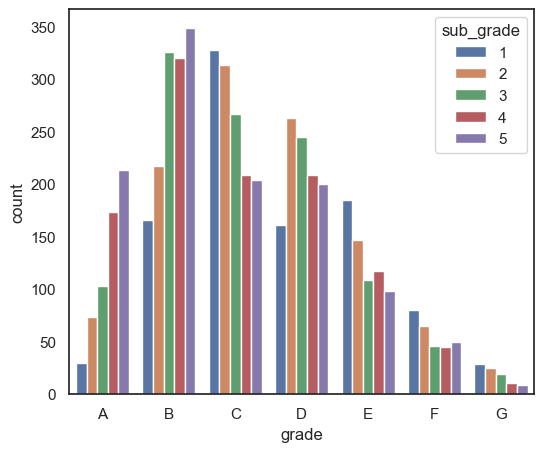

In [322]:
sns.countplot(x='grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue='sub_grade', data=loan_data[loan_data['loan_status'] == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

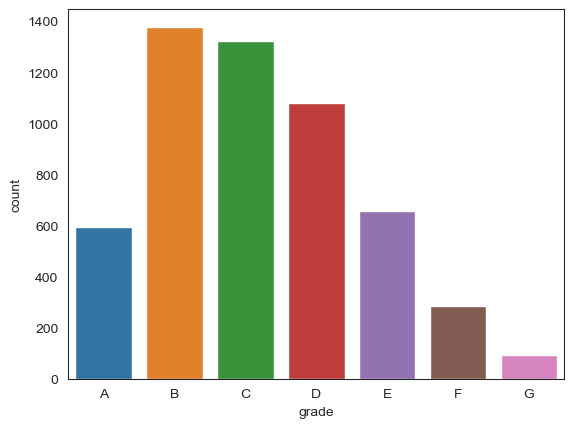

In [40]:
# grade wrt charged off
sns.countplot(x='grade', data=loan_data[loan_data['loan_status']=='Charged Off'], order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

<Axes: xlabel='home_ownership', ylabel='count'>

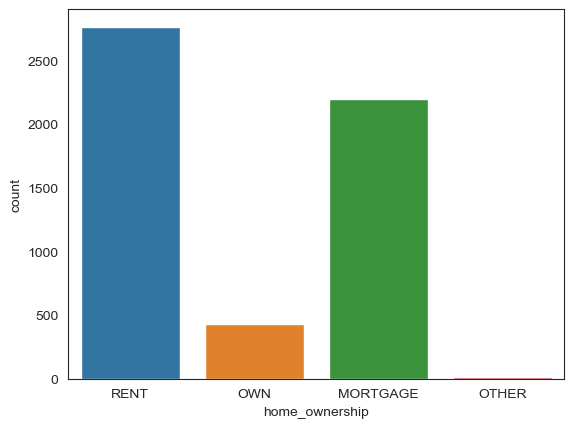

In [41]:
# home_ownership vs charged off
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

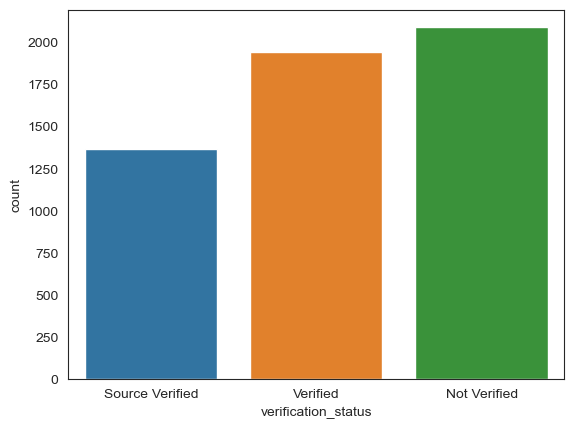

In [42]:
# verification_status vs charged off
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])

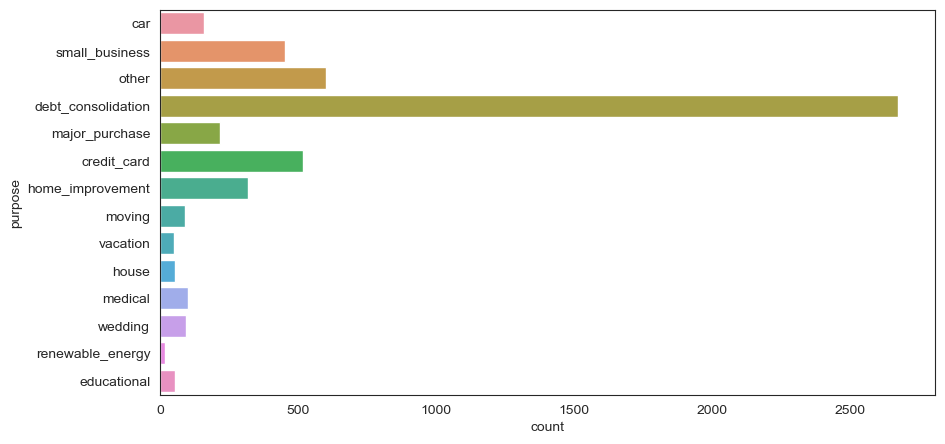

In [64]:
# purpose vs charged off
sns.countplot(y='purpose', data=loan_data[loan_data['loan_status']=='Charged Off'])
fig = plt.gcf()
fig.set_size_inches(10, 5)

### Insights on categorical variables wrt Charged Off

- People under Grade B and subgrade B5 are the most likely to default
- Those who are leaving on Rent are mostly likely to default
- Most people do not have their income surces verified
- `Debt Consolidation` is the foremost purpose for defaulting the loan

## Numerical vs Charged Off

In [43]:
# annual_inc vs charged off
# Creating bins for annual_inc 
loan_data['annual_inc_group'] = pd.cut(loan_data['annual_inc'], bins = 6, precision=0, labels = ['2k-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k'])

In [44]:
loan_data.head()

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,total_pymnt,annual_inc_group
0,1296599,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,AZ,27.65,1,3,0,83.7,9,0.00,5863.155187,2k-20k
1,1314167,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,GA,1.00,5,3,0,9.4,4,0.00,1008.710000,20k-40k
2,1313524,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,IL,8.72,2,2,0,98.5,10,0.00,3005.666844,2k-20k
3,1277178,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,CA,20.00,1,10,0,21.0,37,0.00,12231.890000,20k-40k
4,1311748,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,...,OR,17.94,0,15,0,53.9,38,524.06,3513.330000,60k-80k


#### Converting Numerical column to categorical by creating bins

<Axes: xlabel='annual_inc_group', ylabel='count'>

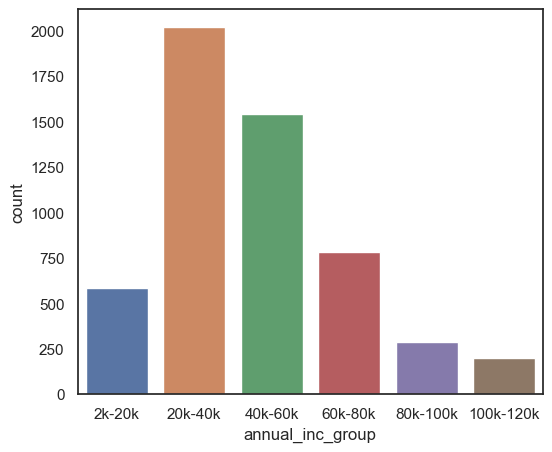

In [354]:
# loan_amnt vs charged off
sns.countplot(x='annual_inc_group', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt'>

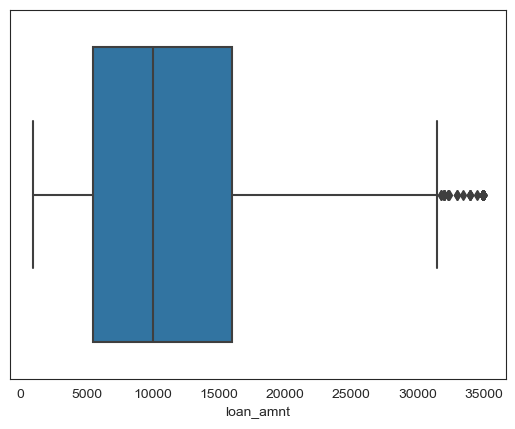

In [45]:
# loan_amnt vs charged off
sns.boxplot(x='loan_amnt', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='int_rate'>

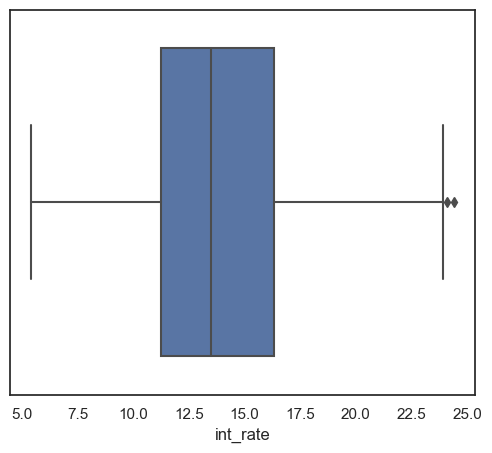

In [338]:
# int_rate vs charged off
sns.boxplot(x='int_rate', data=loan_data[loan_data['loan_status']=='Charged Off'])

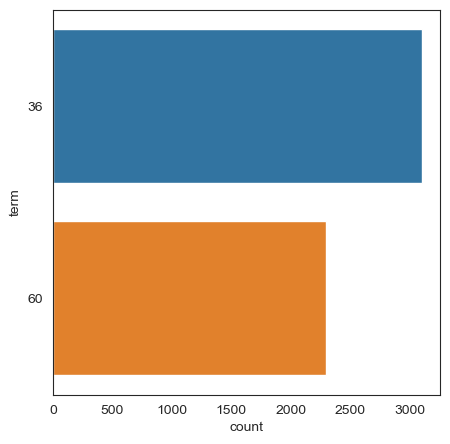

In [71]:
# term vs charged off
sns.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'])
fig = plt.gcf()
fig.set_size_inches(5, 5)

<Axes: xlabel='dti'>

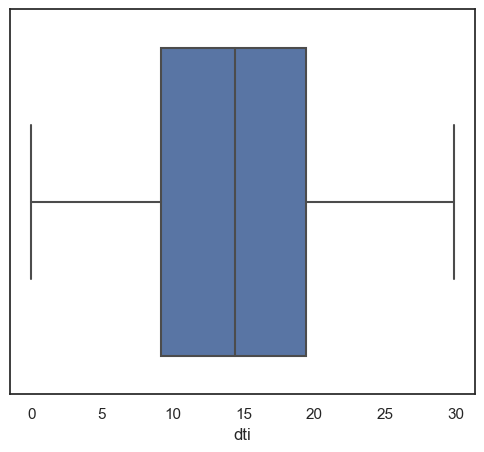

In [341]:
# dti vs charged off
sns.boxplot(x='dti', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='installment'>

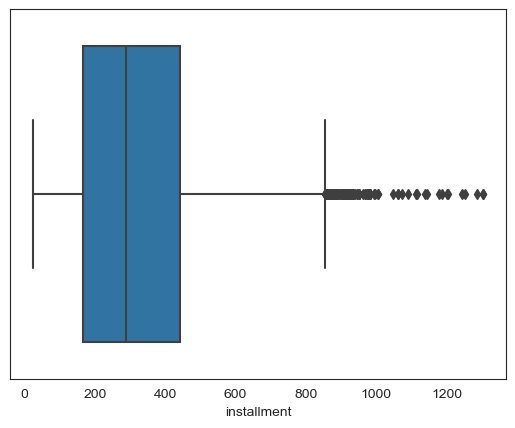

In [47]:
# installment vs charged off
sns.boxplot(x='installment', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

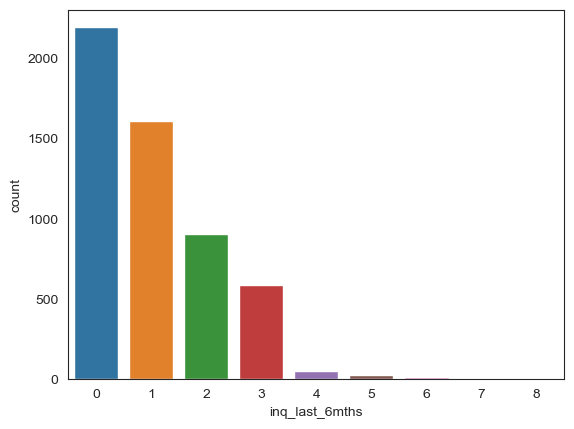

In [48]:
# inq_last_6mths vs charged off
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='total_pymnt'>

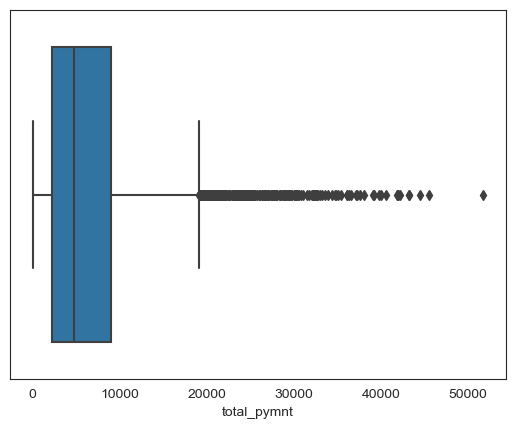

In [72]:
# total_pymnt vs charged off
sns.boxplot(x='total_pymnt', data=loan_data[loan_data['loan_status']=='Charged Off'])

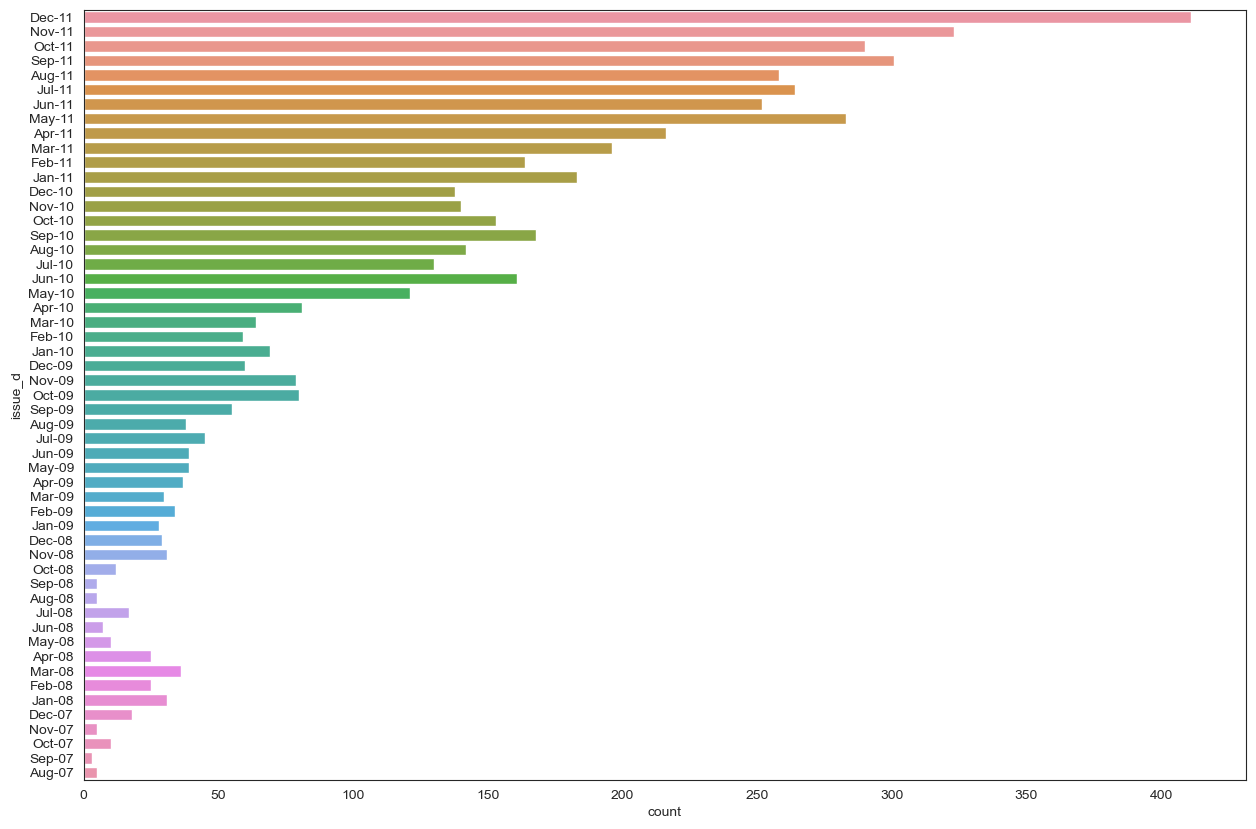

In [84]:
# Issued_d vs Charged Off
sns.countplot(y='issue_d', data=loan_data[loan_data['loan_status'] == 'Charged Off'])
fig = plt.gcf()
fig.set_size_inches(15, 10)

## Insights of Numerical Vs Charged Off

- Most people have annual income between 20k to 40k
- 5k to 15k is the loan amount given to the majority people who are defaulting
- interest rate is 11 to 17 for those under charged off category
- Maximum people got the term of 36 months 
- dti ratio lies between 10 to 20 in this scenario
- installment amount is rupees 200 to 400 for the defaulted ones
- The trend of inquiry last 6 months is 0 for most and is constantly droping 
- 0 to 10k is the range of total payments that defaulted borrowers are having
- Maximum number of defaults occured when the loan was issued in Dec in the year 2011


### Analysis on annual_inc with other columns to get more insights

##### removing current loan status as we are analysing data to find defaulters we need to compare between fully paid and charged off


In [147]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

#### Annual income vs purpose

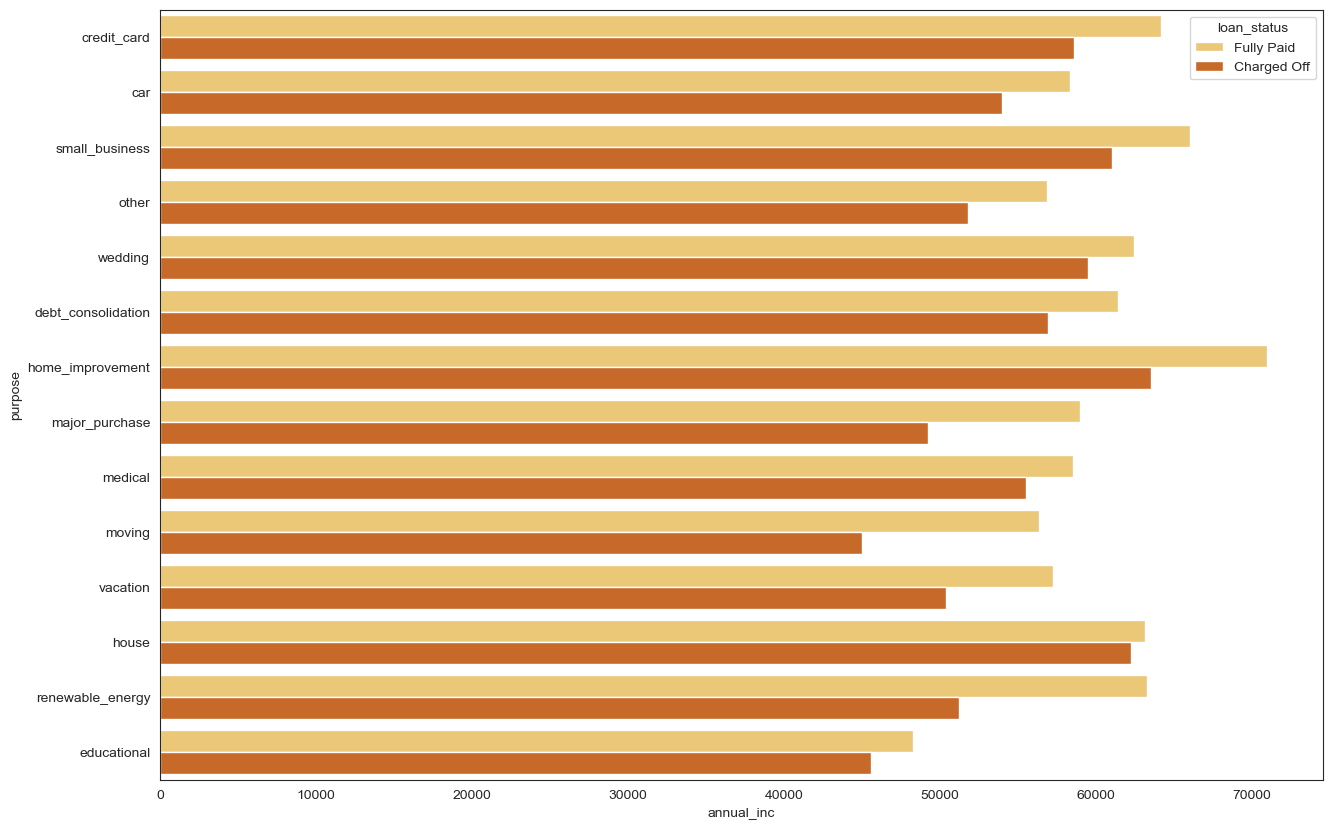

In [107]:
sns.color_palette("rocket_r", as_cmap=True)
sns.barplot(data=loan_data, x='annual_inc', y='purpose', hue='loan_status', palette='YlOrBr', ci=None)
fig = plt.gcf()
fig.set_size_inches(15, 10)

As per previous analysis `debt_consolidation` is the purpose for most of the defaulters but borrower's with heighest salary mostly applied loans for home_improvement, renewable_energy, house, credit_card and small_business

### Annual income vs Loan Amount

<Axes: xlabel='annual_inc_group', ylabel='loan_amnt'>

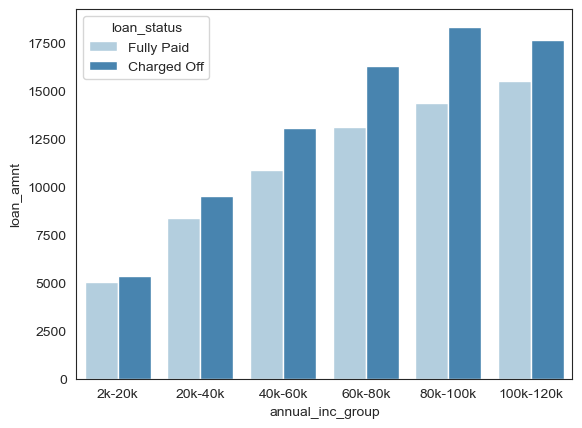

In [138]:
sns.barplot(data=loan_data, x='annual_inc_group', y='loan_amnt', hue='loan_status', palette='Blues', ci=None) 

##### Loan amount is higher for people who defaulted with annual income in the range of `80k to 120k`

### Annual income vs interest Rate

<Axes: xlabel='annual_inc_group', ylabel='int_rate'>

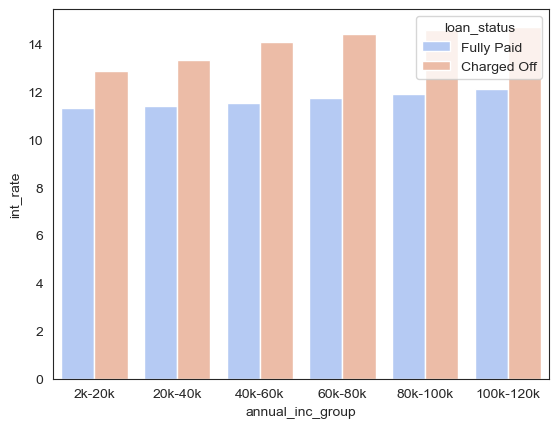

In [137]:
sns.barplot(data= loan_data, x='annual_inc_group', y='int_rate', hue='loan_status',palette="coolwarm", ci=None)

#### People who defaulted has the heighest rate of interest with the annual income of 60k to 120k

### Annual income vs Home ownership

<Axes: xlabel='annual_inc', ylabel='home_ownership'>

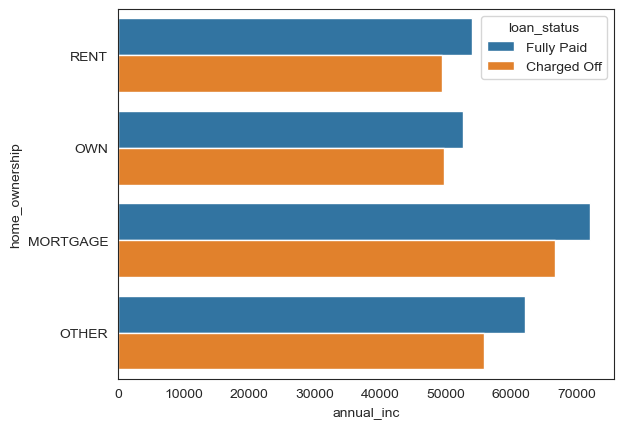

In [150]:
#replacing 'NONE' with 'OTHERS'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
sns.barplot(data=loan_data, x='annual_inc', y='home_ownership', hue='loan_status', ci=None)

### Analysis on loan amount with other columns to get more insights

##### Loan amount vs purpose

<Axes: xlabel='loan_amnt', ylabel='purpose'>

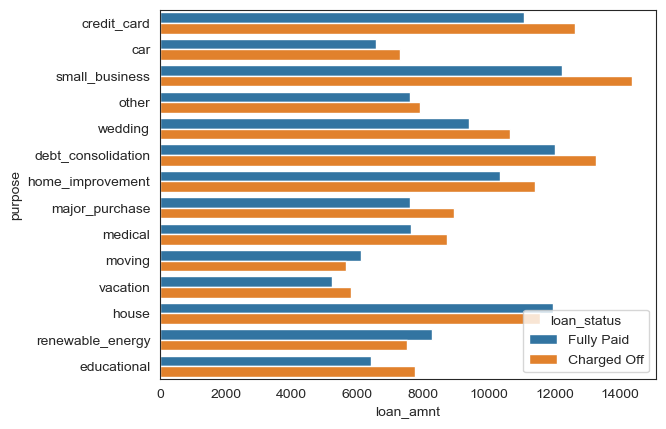

In [136]:
sns.barplot(data=loan_data, x='loan_amnt', y='purpose', hue='loan_status', ci=None)

##### People who defaulted the most has taken loan amount 12k to 14k for `small business` purpose

##### Loan amount vs interest rate

<Axes: xlabel='loan_amnt_groups', ylabel='int_rate'>

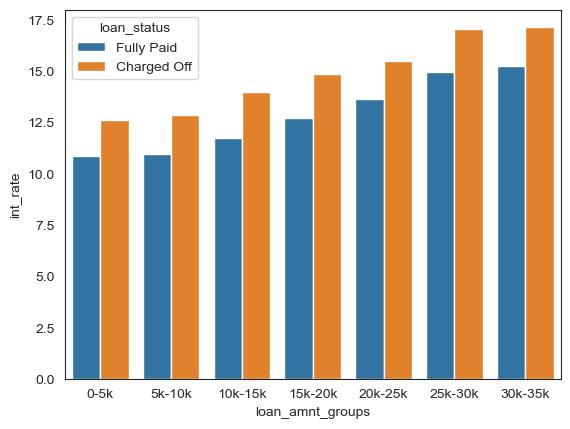

In [135]:
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
sns.barplot(data=loan_data, x='loan_amnt_groups', y='int_rate', hue='loan_status', ci=None)

##### Loan amount vs home ownership

<Axes: xlabel='home_ownership', ylabel='loan_amnt'>

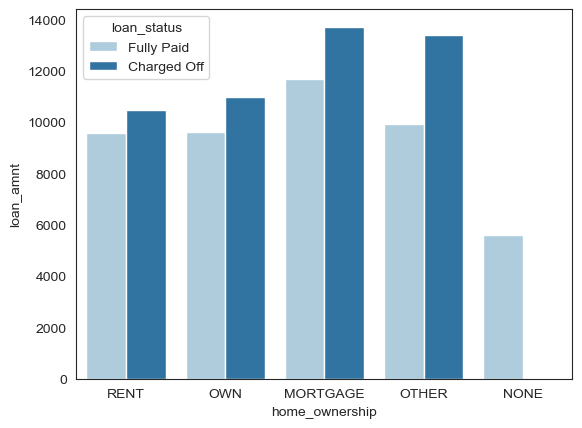

In [139]:
sns.barplot(data=loan_data, y='loan_amnt', x='home_ownership', hue='loan_status', palette='Paired', ci=None)

#### Loan amount vs grade

<Axes: xlabel='grade', ylabel='loan_amnt'>

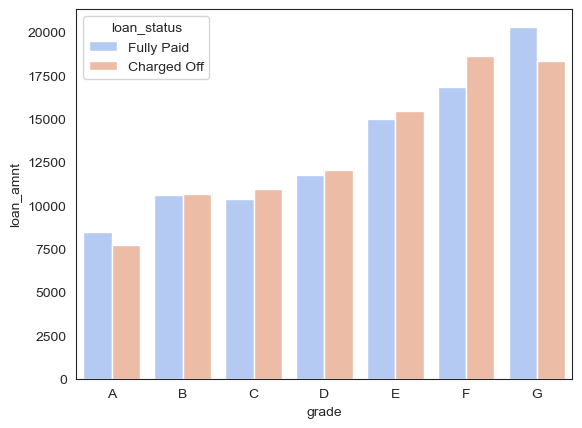

In [141]:
sns.barplot(data=loan_data, x='grade', y='loan_amnt', hue='loan_status', palette='coolwarm', ci=None, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

##### Loan amount vs employment length and verification status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

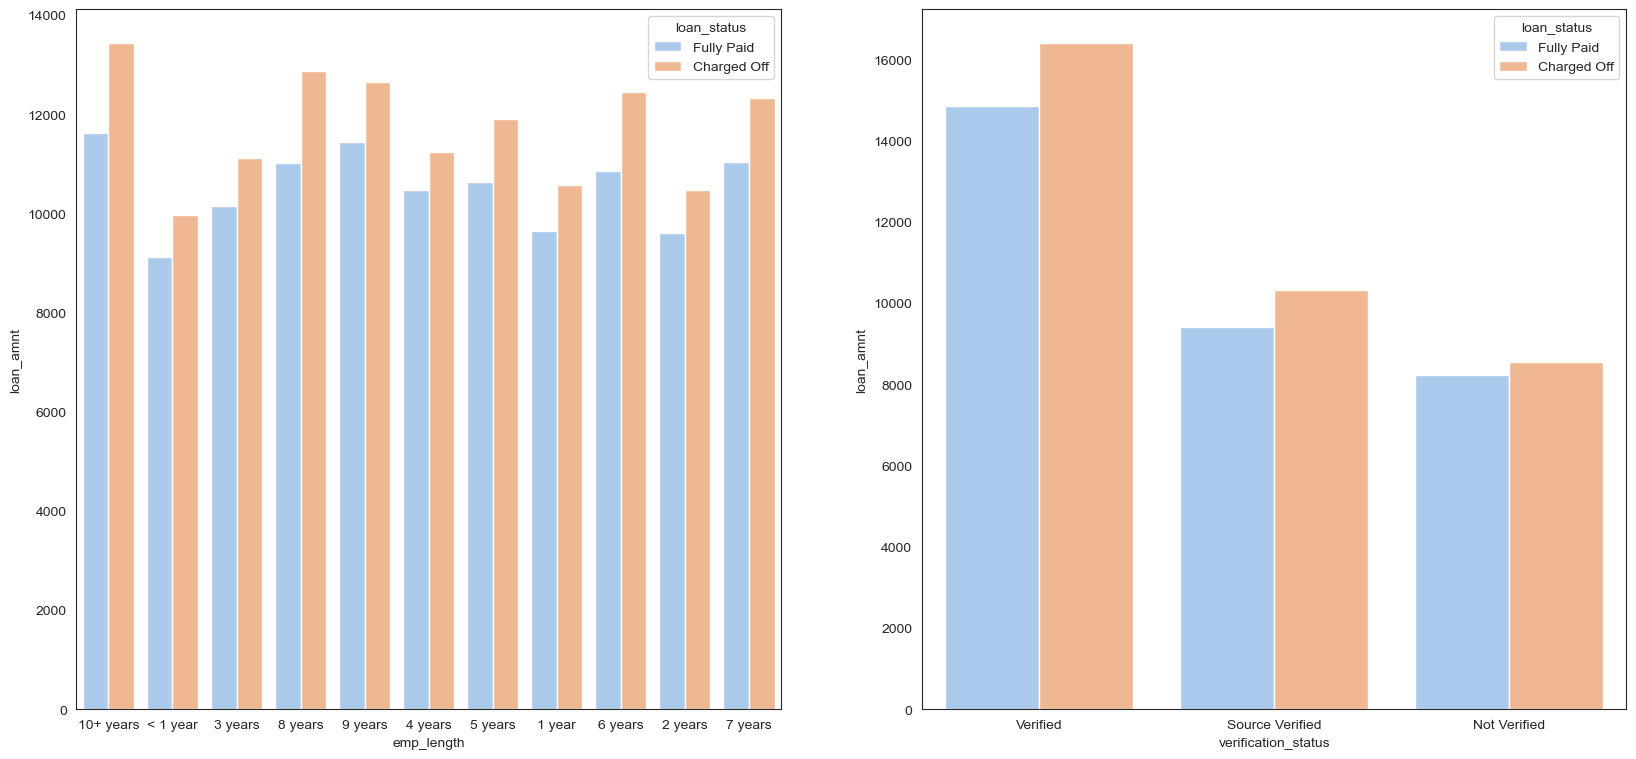

In [143]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel", ci=None)
plt.subplot(222)
sns.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel", ci=None)

##### Loan amount vs term

<Axes: xlabel='term', ylabel='loan_amnt'>

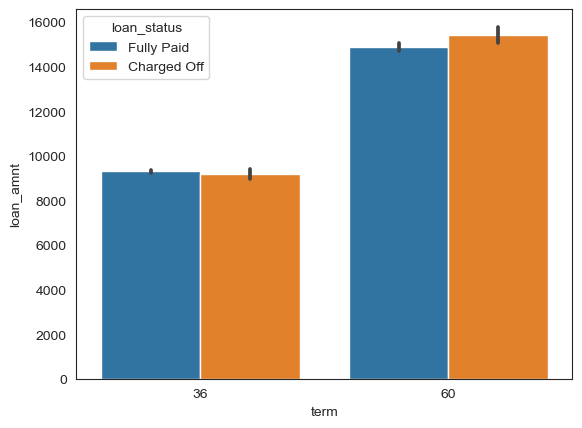

In [146]:
sns.barplot(data=loan_data, x='term', y='loan_amnt', hue='loan_status')

#### People who applied loan for long term has applied for more loan

# Observations

### The analysis shows the probability of defaulting when:

- People who has taken loan for `home improvement` and have income of 60k to 70k
- People whose home ownership is `MORTGAGE` and have income 60k to 70k
- People whose interest rate is greater than 12% and have income of 60k to 120k
- Who defaulted the most has taken loan amount of 12k to 14k for `small business purpose`
- loan amount of 25k to 30k with greater than 15% of interest rate
- People whose home ownership is `MORTGAGE` has loan amount of `10k to 12k`
- When grade is 'F' with loan amount of 15k to 17.5k
- Whose work experience is '10+ years' and have loan amount of 10k to 12k
- Verification done only for heigher loan amount with 14k to 16k

---